In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('plotData.csv')

In [3]:
df.head()

,Unnamed: 0,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22
0,2019-11-05 00:00:00,98.894310,126.933682,94.689281,107.328125,NaN,84.786873,96.313023,99.578835,85.912354,...,95.543915,86.185856,99.401596,78.881619,83.114784,93.060748,100.478717,105.168165,103.595942,96.158620
1,2019-11-05 00:01:00,101.238907,120.542236,109.287640,99.872089,90.789818,92.261373,85.954595,110.415169,90.073643,...,74.656012,97.296799,109.488636,91.452306,103.764979,108.464836,110.584831,110.188009,95.428902,91.697350
2,2019-11-05 00:02:00,94.386368,102.647774,87.449806,86.383228,NaN,83.691719,66.709484,106.517502,90.534679,...,88.185567,101.224186,92.785136,84.924156,83.138504,113.091708,112.883886,92.486628,113.592051,115.223778
3,2019-11-05 00:03:00,80.918354,96.385818,91.669785,91.212303,80.765694,86.695862,87.335812,98.658936,89.150604,...,89.059288,85.174328,104.964650,89.646152,105.344521,133.598927,84.535585,79.591124,101.083019,98.223356
4,2019-11-05 00:04:00,103.639690,84.957104,92.271114,103.514515,NaN,94.097865,88.365051,98.633747,80.178834,...,95.166771,106.742462,93.910664,86.232574,108.588552,107.698845,105.207812,104.379168,103.132718,83.305611


In [4]:
km = [0,1300,3000,5100,6955,9310,11320,13220,15590,17825,19920,21335,23255,25375,28020,30620]

In [5]:
len(km)

16

In [6]:
# Create an empty list 
Row_list =[] 
  
# Iterate over each row 
for index, rows in df.iterrows(): 
    # Create list for the current row 
    my_list =[rows['sensor{}'.format(i)] for i in range(1,34) if i%2==0] 
      
    # append the list to the final list 
    Row_list.append(my_list) 

KeyError: 'sensor24'

In [7]:
plt.scatter(km, Row_list[0])

IndexError: list index out of range

In [8]:
p4 = np.poly1d(np.polyfit(km, Row_list[0], 10))

IndexError: list index out of range

In [9]:
xp = np.linspace(0,30700,1000)
plt.scatter(km, Row_list[0])
plt.plot(xp, p4(xp), c='r')

IndexError: list index out of range

In [10]:
p4 = np.poly1d(np.polyfit(km, Row_list[1], 10))
xp = np.linspace(0,30700,1000)
plt.scatter(km, Row_list[1])
plt.plot(xp, p4(xp), c='r')

IndexError: list index out of range

In [11]:
def nan_helper(y):
    return np.isnan(y), lambda z: z.nonzero()[0]

In [12]:
def interpolation(km, Rowlist_ind):
    y= np.array(Row_list[Rowlist_ind])
    nans, x= nan_helper(y)
    y[nans]= np.interp(x(nans), x(~nans), y[~nans])
    p4 = np.poly1d(np.polyfit(km, y, 10))
    row = [p4(i*100) for i in range(307)]
    return row

In [13]:
times = pd.date_range("2019-11-05 00:00:00", "2019-11-05 23:59:00", freq="1min")   
df_None = pd.DataFrame(columns=[i*100 for i in range(307)], index=times)

In [14]:
dist = km
for i, t in enumerate(times):
    row_int = interpolation(dist, i)
    df_None.loc[t] = row_int

IndexError: list index out of range

In [15]:
df_None

,0,100,200,300,400,500,600,700,800,900,...,29700,29800,29900,30000,30100,30200,30300,30400,30500,30600
2019-11-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 00:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-05 23:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 23:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 23:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-11-05 23:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_None[df_None < 0] = 0

In [17]:
Z = df_None.to_numpy().transpose()

In [18]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [19]:
y = np.arange(307)
x = np.arange(1440)
X, Y = np.meshgrid(x,y)

C:\Users\ideapad 330\Anaconda3\lib\site-packages\numpy\core\_methods.py:43: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\ideapad 330\Anaconda3\lib\site-packages\numpy\core\_methods.py:39: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)
C:\Users\ideapad 330\Anaconda3\lib\site-packages\matplotlib\contour.py:1483: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\ideapad 330\Anaconda3\lib\site-packages\matplotlib\contour.py:1484: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


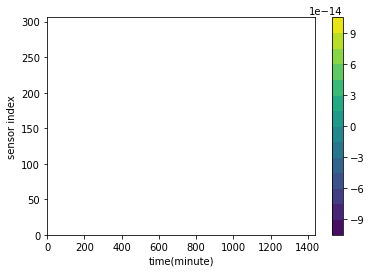

In [20]:
cmap = plt.get_cmap('viridis')
levels = MaxNLocator(nbins=15).tick_values(Z.min(), Z.max())
fig = plt.figure()
ax1 = plt.contourf(X, Y, Z, levels=levels, cmap=cmap)
plt.colorbar(ax1)
plt.ylabel('sensor index')
plt.xlabel('time(minute)')
plt.savefig('growth24.png')
plt.show()